In [1]:
%matplotlib inline


Audio Datasets
========

``torchaudio`` provides easy access to common, publicly accessible
datasets. Please refer to the official documentation for the list of
available datasets.


In [2]:
# When running this tutorial in Google Colab, install the required packages
# with the following.
# !pip install torchaudio

import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

1.10.0+cu111
0.10.0+cu111


Preparing data and utility functions (skip this section)
--------------------------------------------------------




In [3]:
#@title Prepare data and utility functions. {display-mode: "form"}
#@markdown
#@markdown You do not need to look into this cell.
#@markdown Just execute once and you are good to go.

#-------------------------------------------------------------------------------
# Preparation of data and helper functions.
#-------------------------------------------------------------------------------
import multiprocessing
import os

import matplotlib.pyplot as plt
from IPython.display import Audio, display


_SAMPLE_DIR = "_sample_data"
YESNO_DATASET_PATH = os.path.join(_SAMPLE_DIR, "yes_no")
os.makedirs(YESNO_DATASET_PATH, exist_ok=True)

def _download_yesno():
  if os.path.exists(os.path.join(YESNO_DATASET_PATH, "waves_yesno.tar.gz")):
    return
  torchaudio.datasets.YESNO(root=YESNO_DATASET_PATH, download=True)

YESNO_DOWNLOAD_PROCESS = multiprocessing.Process(target=_download_yesno)
YESNO_DOWNLOAD_PROCESS.start()

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

Here, we show how to use the ``YESNO`` dataset.




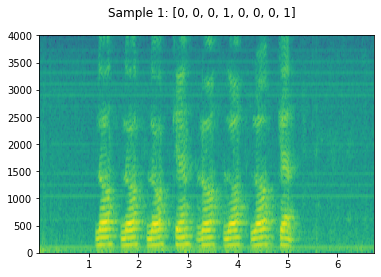

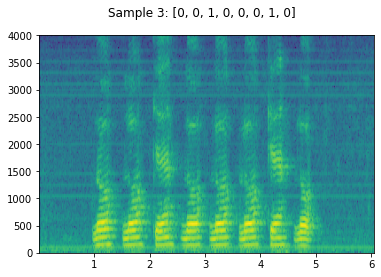

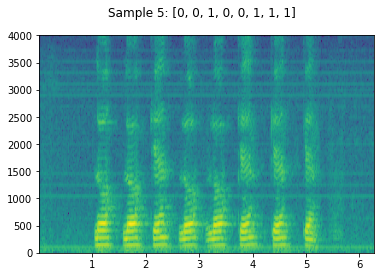

In [4]:
YESNO_DOWNLOAD_PROCESS.join()

dataset = torchaudio.datasets.YESNO(YESNO_DATASET_PATH, download=True)

for i in [1, 3, 5]:
  waveform, sample_rate, label = dataset[i]
  plot_specgram(waveform, sample_rate, title=f"Sample {i}: {label}")
  play_audio(waveform, sample_rate)